In [11]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from tqdm import tqdm

sns.set_theme("notebook")

In [12]:
RESULTS_DIR = Path("/data5/anasynth_nonbp/andre/reverse-dj-mix/results")
UNMIXDB_PATH = Path("/data2/anasynth_nonbp/schwarz/abc-dj/data/unmixdb-zenodo")

In [13]:
results = []
for i in tqdm(RESULTS_DIR.glob("*/*/results.pickle")):
    with open(i, "rb") as f:
        data = pickle.load(f)
        data["run"] = i.parent.parent.name
        results.append(data)

1030it [00:02, 354.10it/s]


In [14]:
import math


data = (
    pd.json_normalize(results)
)
data[["set", "mix", "stretch", "fx", "submix"]] = data["mix.name"].str.extract(r"set(\d+)mix(\d+)-(\w+)-(\w+)-(\d+)")
data["transformation"] = data["stretch"] + " " + data["fx"]
data

,mix.name,gain_real,warp_real,gain_est,warp_est,gain_err,warp_err,H,tau,time,run,set,mix,stretch,fx,submix,transformation
0,set275mix3-none-distortion-30.mp3,"[[0.0, 0.0, 0.0], [0.02406616722556158, 0.0, 0...","[[2.8140235815, nan, nan], [3.3140235815, nan,...","[[0.1299828, 0.017294616, 0.0], [0.22477339, 0...","[[6.5, 1.5, 0.0], [14.5, 1.5, 0.0], [14.5, 1.5...",0.841257,6.087191,"[[tensor(2.2836e-06, grad_fn=<UnbindBackward0>...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...",54.771874,2024-07-24T16:35:57.860928,275,3,none,distortion,30,none distortion
1,set275mix3-none-none-00.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-24T16:38:00.767089,275,3,none,none,00,none none
2,set275mix3-none-distortion-30.mp3,"[[0.0, 0.0, 0.0], [0.02406616722556158, 0.0, 0...","[[2.8140235815, nan, nan], [3.3140235815, nan,...","[[0.1299828, 0.017294616, 0.0], [0.22477339, 0...","[[6.5, 1.5, 0.0], [14.5, 1.5, 0.0], [14.5, 1.5...",0.841257,6.087191,"[[2.2836105e-06, 1.9256543e-06, 0.0027460915, ...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...",54.862487,2024-07-24T16:38:00.767089,275,3,none,distortion,30,none distortion
3,set275mix3-resample-compressor-21.mp3,"[[0.0, 0.0, 0.0], [0.022051411290308704, 0.0, ...","[[2.564409069, nan, nan], [3.064409069, nan, n...","[[0.7312314, 0.0, 0.08031431], [0.68573225, 0....","[[45.0, 0.0, 39.0], [45.0, 0.0, 39.0], [45.0, ...",0.134769,19.276104,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...",30.011206,2024-07-24T16:38:00.767089,275,3,resample,compressor,21,resample compressor
4,set275mix3-stretch-compressor-30.mp3,"[[0.0, 0.0, 0.0], [0.02406616722556158, 0.0, 0...","[[2.8140235815, nan, nan], [3.3140235815, nan,...","[[0.1359346, 0.0, 0.0], [0.19885051, 0.0, 0.0]...","[[3.0, 0.0, 0.0], [3.5, 0.0, 0.0], [4.0, 0.0, ...",0.080371,0.644484,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...",43.338596,2024-07-24T16:38:00.767089,275,3,stretch,compressor,30,stretch compressor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,set275mix3-none-none-03.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-24T16:48:31.525374,275,3,none,none,03,none none
1026,set275mix3-resample-bass-08.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-24T16:48:31.525374,275,3,resample,bass,08,resample bass
1027,set275mix3-stretch-distortion-06.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-24T16:48:31.525374,275,3,stretch,distortion,06,stretch distortion
1028,set275mix3-none-distortion-30.mp3,"[[0.0, 0.0, 0.0], [0.02406616722556158, 0.0, 0...","[[2.8140235815, nan, nan], [3.3140235815, nan,...","[[0.1299828, 0.017294616, 0.0], [0.22477339, 0...","[[6.5, 1.5, 0.0], [14.5, 1.5, 0.0], [14.5, 1.5...",0.841257,6.087191,"[[2.2836105e-06, 1.9256543e-06, 0.0027460915, ...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...",53.779948,2024-07-24T16:49:17.366942,275,3,none,distortion,30,none distortion


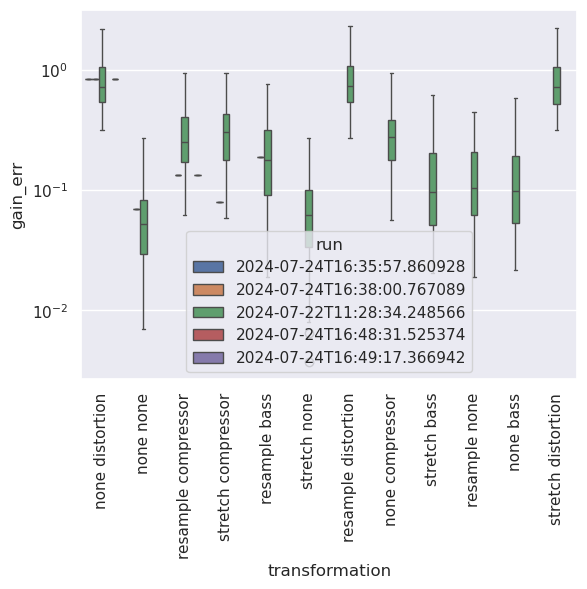

In [15]:
sns.boxplot(data, x="transformation", y="gain_err", hue="run", log_scale=True)
plt.xticks(rotation=90)
plt.show()

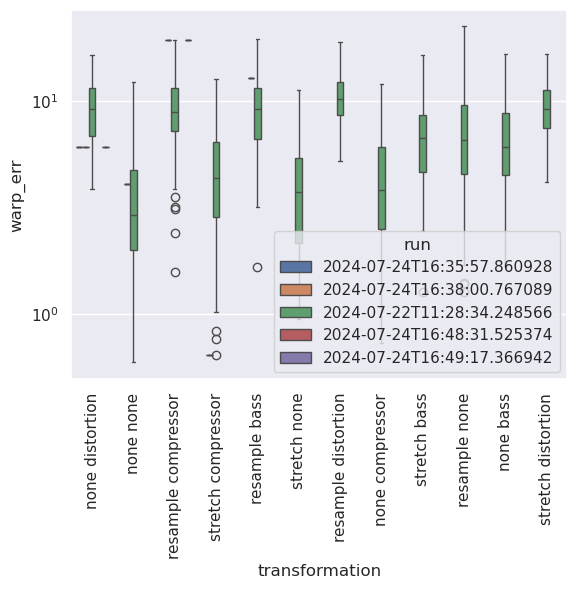

In [16]:
sns.boxplot(data, x="transformation", y="warp_err", hue="run", log_scale=True)
plt.xticks(rotation=90)
plt.show()

In [17]:
data.sort_values(by="warp_err")

,mix.name,gain_real,warp_real,gain_est,warp_est,gain_err,warp_err,H,tau,time,run,set,mix,stretch,fx,submix,transformation
990,set044mix3-none-none-15.mp3,"[[0.0, 0.0, 0.0], [0.023135324335230283, 0.0, ...","[[3.6325269829, nan, nan], [4.1325269829, nan,...","[[0.0, 0.0, 0.0], [0.029914668, 0.0, 0.0], [0....","[[0.0, 0.0, 0.0], [6.5, 0.0, 0.0], [6.0, 0.0, ...",0.050783,0.591451,NaN,NaN,31.424293,2024-07-22T11:28:34.248566,044,3,none,none,15,none none
4,set275mix3-stretch-compressor-30.mp3,"[[0.0, 0.0, 0.0], [0.02406616722556158, 0.0, 0...","[[2.8140235815, nan, nan], [3.3140235815, nan,...","[[0.1359346, 0.0, 0.0], [0.19885051, 0.0, 0.0]...","[[3.0, 0.0, 0.0], [3.5, 0.0, 0.0], [4.0, 0.0, ...",0.080371,0.644484,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...",43.338596,2024-07-24T16:38:00.767089,275,3,stretch,compressor,30,stretch compressor
428,set275mix3-stretch-compressor-30.mp3,"[[0.0, 0.0, 0.0], [0.02406616722556158, 0.0, 0...","[[2.8140235815, nan, nan], [3.3140235815, nan,...","[[0.1359346, 0.0, 0.0], [0.19885051, 0.0, 0.0]...","[[3.0, 0.0, 0.0], [3.5, 0.0, 0.0], [4.0, 0.0, ...",0.080371,0.644484,NaN,NaN,49.969969,2024-07-22T11:28:34.248566,275,3,stretch,compressor,30,stretch compressor
27,set123mix3-none-none-00.mp3,"[[0.0, 0.0, 0.0], [0.023708453757364634, 0.0, ...","[[2.6805088423, nan, nan], [3.1805088423, nan,...","[[0.018636853, 0.0, 0.0], [0.033455063, 0.0, 0...","[[3.5, 0.0, 0.0], [4.0, 0.0, 0.0], [4.5, 0.0, ...",0.036039,0.668947,NaN,NaN,43.623758,2024-07-22T11:28:34.248566,123,3,none,none,00,none none
142,set275mix3-none-compressor-28.mp3,"[[0.0, 0.0, 0.0], [0.021734244890165916, 0.0, ...","[[3.4119374137, nan, nan], [3.9119374137, nan,...","[[0.16361767, 0.0, 0.009566421], [0.23713829, ...","[[4.0, 0.0, 0.0], [4.5, 0.0, 0.0], [4.5, 0.0, ...",0.062363,0.727071,NaN,NaN,47.263072,2024-07-22T11:28:34.248566,275,3,none,compressor,28,none compressor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,set275mix3-stretch-compressor-30.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-24T16:48:31.525374,275,3,stretch,compressor,30,stretch compressor
1024,set275mix3-stretch-distortion-07.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-24T16:48:31.525374,275,3,stretch,distortion,07,stretch distortion
1025,set275mix3-none-none-03.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-24T16:48:31.525374,275,3,none,none,03,none none
1026,set275mix3-resample-bass-08.mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-24T16:48:31.525374,275,3,resample,bass,08,resample bass
